<a href="https://colab.research.google.com/github/flaviorv/ml_clustering/blob/main/clustering_at.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

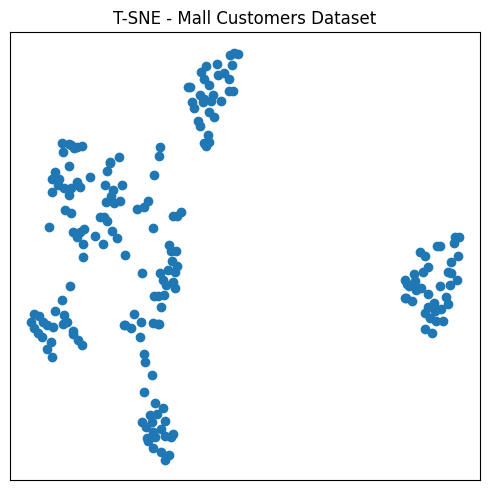

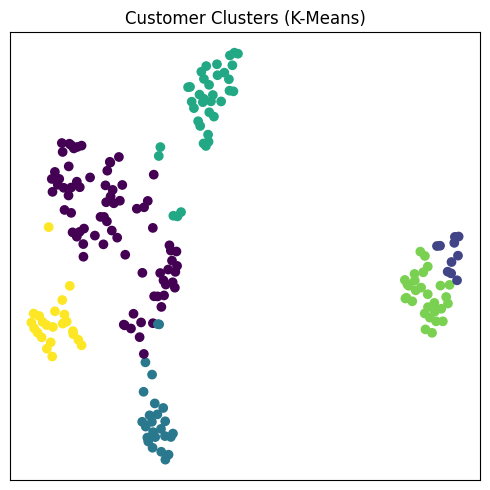

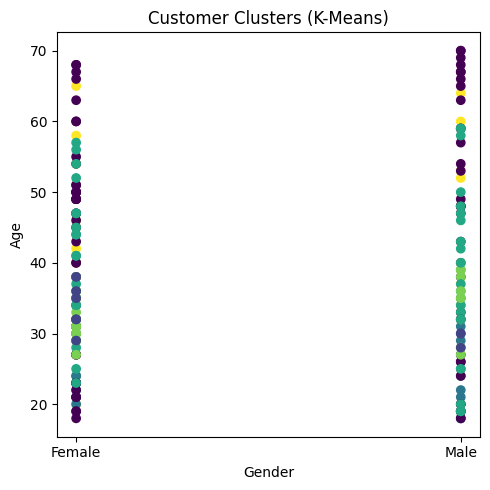

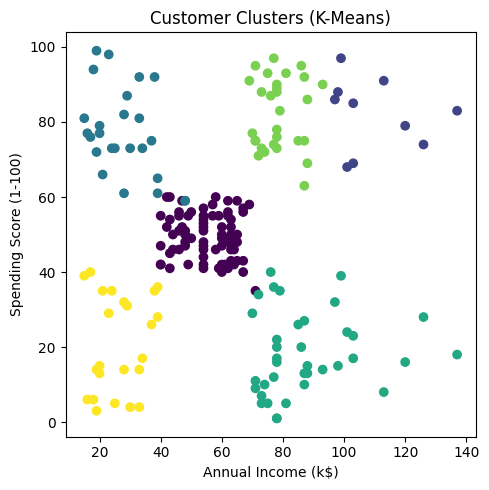


Vector quantization analysis (K-Means)
     Gender        Age  Annual Income (k$)  Spending Score (1-100)
0  0.407895  43.934211           55.210526               49.447368
1  0.400000  32.200000          109.700000               82.000000
2  0.440000  24.960000           28.040000               77.000000
3  0.513514  40.324324           87.432432               18.189189
4  0.482759  32.862069           78.551724               82.172414
5  0.391304  45.217391           26.304348               20.913043

PCA analysis
     P Component 1  P Component 2
0       -31.869945     -33.001252
1         0.764494     -56.842901
2       -57.408276     -13.124961
3        -2.168543     -53.478590
4       -32.174085     -30.388412
..             ...            ...
195      58.352515      31.017542
196      19.908001      66.446108
197      58.520804      38.346039
198      20.979130      79.376405
199      72.447693      41.811336

[200 rows x 2 columns]

Dimensiolanity reduction - PCA vs K-Means
Or

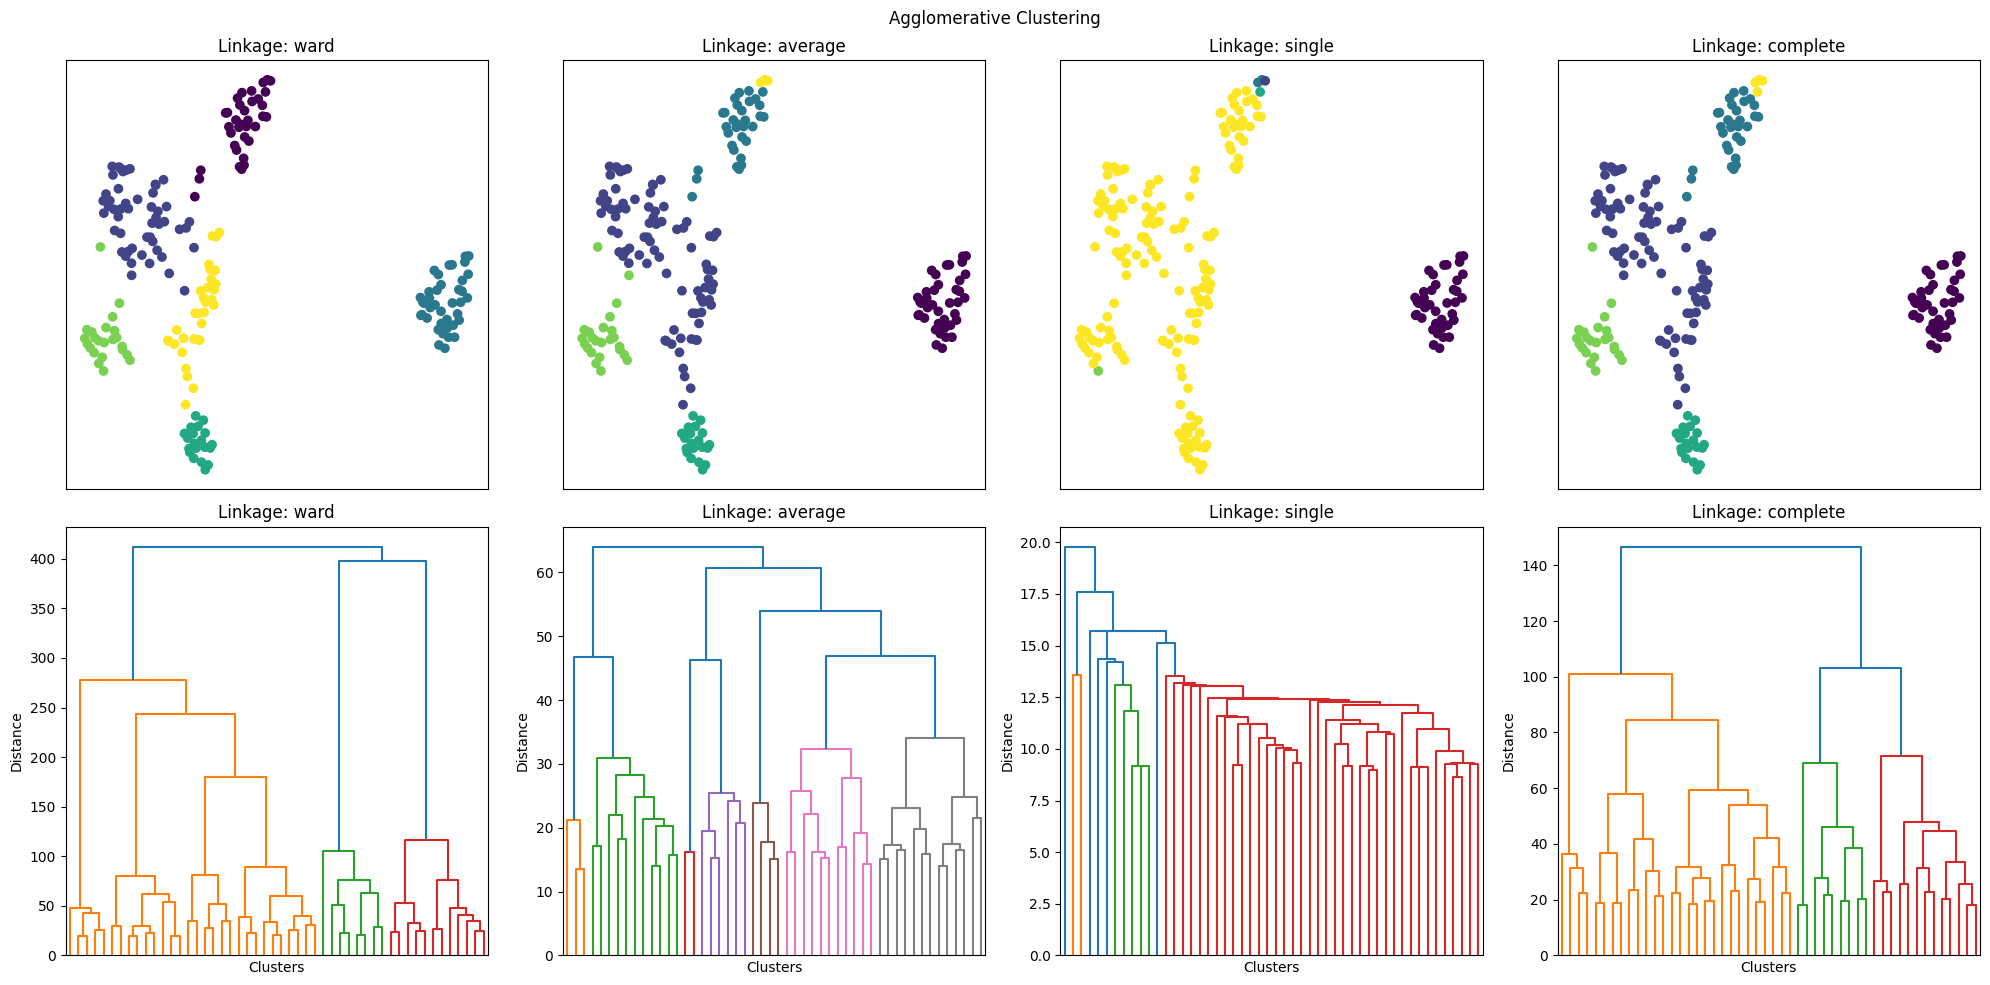

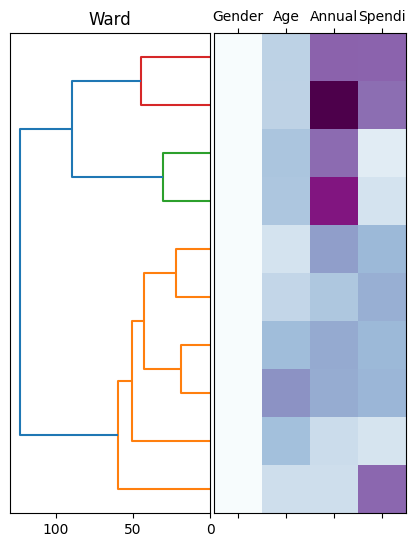

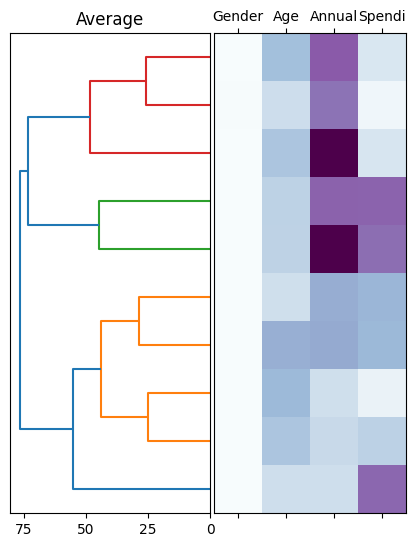

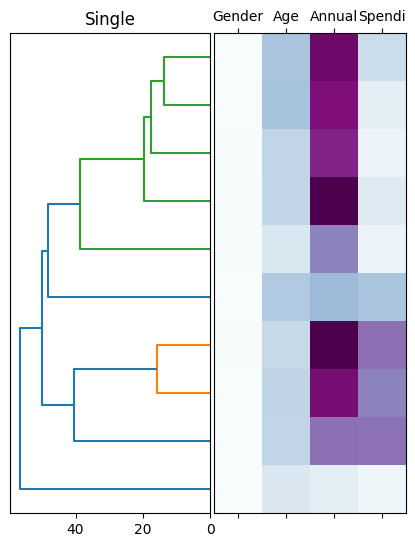

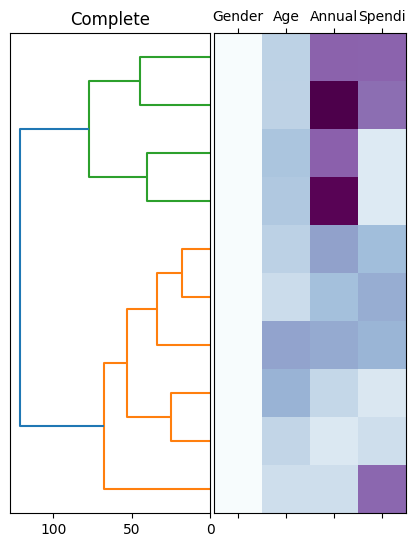

In [2]:
# Loading dataset
data = pd.read_csv('https://raw.githubusercontent.com/flaviorv/ml_clustering/refs/heads/main/datasets/Mall_Customers.csv')

# Feature engineering
gender_map = {'Female': 0, 'Male': 1}
data['Gender'] = data['Gender'].map(gender_map)

x = data.dropna()
x = x.drop(columns=['CustomerID'], axis=1)

# Configs
n_clusters = 6
perplexity = 25

# Dimensionality reduciton with T-SNE for charts ploting
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
x_tsne = tsne.fit_transform(x)
plt.figure(figsize=(5,5))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1])
plt.xticks([])
plt.yticks([])
plt.title('T-SNE - Mall Customers Dataset')
plt.tight_layout()
plt.show()

# Clustering with K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, algorithm='elkan')
clusters = kmeans.fit_predict(x)

# Show clusters
plt.figure(figsize=(5,5))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=clusters)
plt.title('Customer Clusters (K-Means)')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

# Show clusters by features (Gender and Age)
plt.figure(figsize=(5,5))
plt.scatter(x['Gender'], x['Age'], c=clusters)
plt.xlabel('Gender')
plt.xticks([0 , 1], ['Female', 'Male'])
plt.ylabel('Age')
plt.title('Customer Clusters (K-Means)')
plt.tight_layout()
plt.show()

# Show clusters by features (Annual Income and Spending Score)
plt.figure(figsize=(5,5))
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c=clusters)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Clusters (K-Means)')
plt.tight_layout()
plt.show()

# Dimensionality reduction with K-Means and PCA
print("\nVector quantization analysis (K-Means)")
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=x.columns)
print(centroids_df)

print('\nPCA analysis')
pca = PCA(n_components=2)
pca_labels = ['P Component 1', 'P Component 2']
components = pca.fit_transform(x)
components_df = pd.DataFrame(components, columns=pca_labels)
print(components_df)

print('\nDimensiolanity reduction - PCA vs K-Means')
print('Original shape:', x.shape)
print('K-Means shape:', centroids_df.shape)
print('PCA shape:', components_df.shape)

# Agglomerative Clustering

linkages = ['ward', 'average', 'single', 'complete']

fig, ax = plt.subplots(2, 4, figsize=(20,10))
for i, l in enumerate(linkages):
  ac = AgglomerativeClustering(n_clusters=6, linkage=l)
  ac.fit(x)
  labels = ac.labels_

  # Clusters - scatter plot
  ax[0, i].scatter(x_tsne[:, 0], x_tsne[:, 1], c=labels)
  ax[0, i].set_xticks([])
  ax[0, i].set_yticks([])
  ax[0, i].set_title(f'Linkage: {l}')

  # Dendrogram
  lin = linkage(x, l)
  dendrogram(lin, orientation='top', truncate_mode='lastp', ax=ax[1,i], p=50)
  ax[1, i].set_xlabel('Clusters')
  ax[1, i].set_ylabel('Distance')
  ax[1, i].set_title(f'Linkage: {l}')
  ax[1, i].set_xticks([])
plt.suptitle('Agglomerative Clustering')
plt.tight_layout()
plt.show()

# dendrogram with heatmap
df = pd.DataFrame(x, columns=x.columns)
n_prune = 10

for l in linkages:
  lin = linkage(df, l)
  labels = fcluster(lin, t=n_prune, criterion='maxclust')
  df['cluster'] = labels
  pruned = df.groupby('cluster').mean()

  set_labels = True

  # dendrogram
  fig = plt.figure(figsize=(10, 8), facecolor='white')
  axd = fig.add_axes([0.24, 0.1, 0.2, 0.6])
  lin = linkage(pruned, l)
  den = dendrogram(lin, labels=pruned.index, orientation='left', no_labels=not set_labels)
  sorted = pruned.iloc[den['leaves'][::-1]]

  # heatmap
  axm = fig.add_axes([0.24, 0.1, 0.6, 0.6])
  cax = axm.matshow(sorted,  interpolation='nearest', cmap='BuPu')
  axm.set_yticks([])
  if (set_labels):
    axm.set_xticks(np.arange(sorted.shape[1]))
    short_labels = [col[:6] for col in sorted.columns]
    axm.set_xticklabels(short_labels)
  else:
    axm.set_xticks([])
  axd.set_title(l.capitalize())
  plt.show()